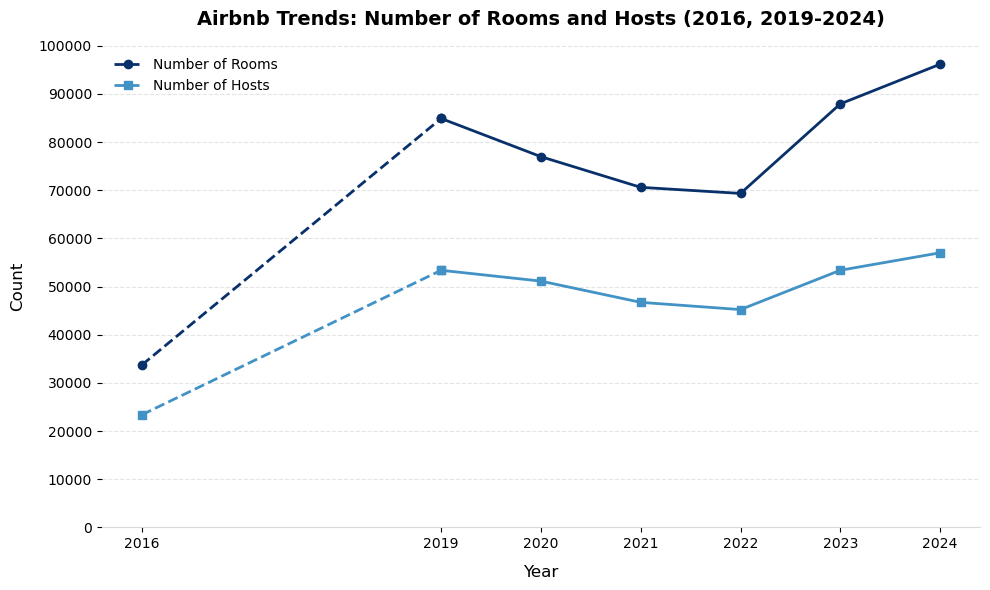

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

data_2016 = pd.read_csv('cleaned_2016_data.csv') 
data_2019 = pd.read_csv('cleaned_2019_data.csv')
data_2020 = pd.read_csv('cleaned_2020_data.csv')
data_2021 = pd.read_csv('cleaned_2021_data.csv')
data_2022 = pd.read_csv('cleaned_2022_data.csv')
data_2023 = pd.read_csv('cleaned_2023_data.csv')
data_2024 = pd.read_csv('cleaned_2024_data.csv')

# Add year column
data_2016['year'] = 2016
data_2019['year'] = 2019
data_2020['year'] = 2020
data_2021['year'] = 2021
data_2022['year'] = 2022
data_2023['year'] = 2023
data_2024['year'] = 2024

# Combine all data
all_data = pd.concat([data_2016, data_2019, data_2020, data_2021, data_2022, data_2023, data_2024])

# Calculate the total number of listings and unique hosts for each year
room_count = all_data.groupby('year')['id'].count()
host_count = all_data.groupby('year')['host_id'].nunique()

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot rooms and hosts with segmented line styles
plt.plot(room_count.index[:2], room_count.values[:2], marker='o', label='Number of Rooms', 
         color='#08306B', linewidth=2, linestyle='--')  # Dashed for 2016-2019
plt.plot(room_count.index[1:], room_count.values[1:], marker='o', color='#08306B', linewidth=2)  # Solid for 2019-2024

plt.plot(host_count.index[:2], host_count.values[:2], marker='s', label='Number of Hosts', 
         color='#4292C6', linewidth=2, linestyle='--')  # Dashed for 2016-2019
plt.plot(host_count.index[1:], host_count.values[1:], marker='s', color='#4292C6', linewidth=2)  # Solid for 2019-2024

# Add title, grid, and labels
plt.title('Airbnb Trends: Number of Rooms and Hosts (2016, 2019-2024)', fontsize=14, pad=15, weight='bold')
plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)

# Set Y-axis limit to 100,000
plt.ylim(0, 100000)

# Set Y-axis ticks with 10000 intervals
plt.yticks(range(0, 100001, 10000))

# Customize the axes and gridlines
plt.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.8, alpha=0.7)  # Show horizontal gridlines only
plt.gca().spines['top'].set_visible(False)  # Remove the top border
plt.gca().spines['right'].set_visible(False)  # Remove the right border
plt.gca().spines['left'].set_visible(False)  # Remove the left border
plt.gca().spines['bottom'].set_color('#D9D9D9')  # Set bottom border to light gray

# Adjust tick styles
plt.xticks(room_count.index, fontsize=10)
plt.yticks(fontsize=10)

# Set legend
plt.legend(fontsize=10, loc='upper left', frameon=False)  # Single legend for simplified understanding

# Display the plot
plt.tight_layout()
plt.show()


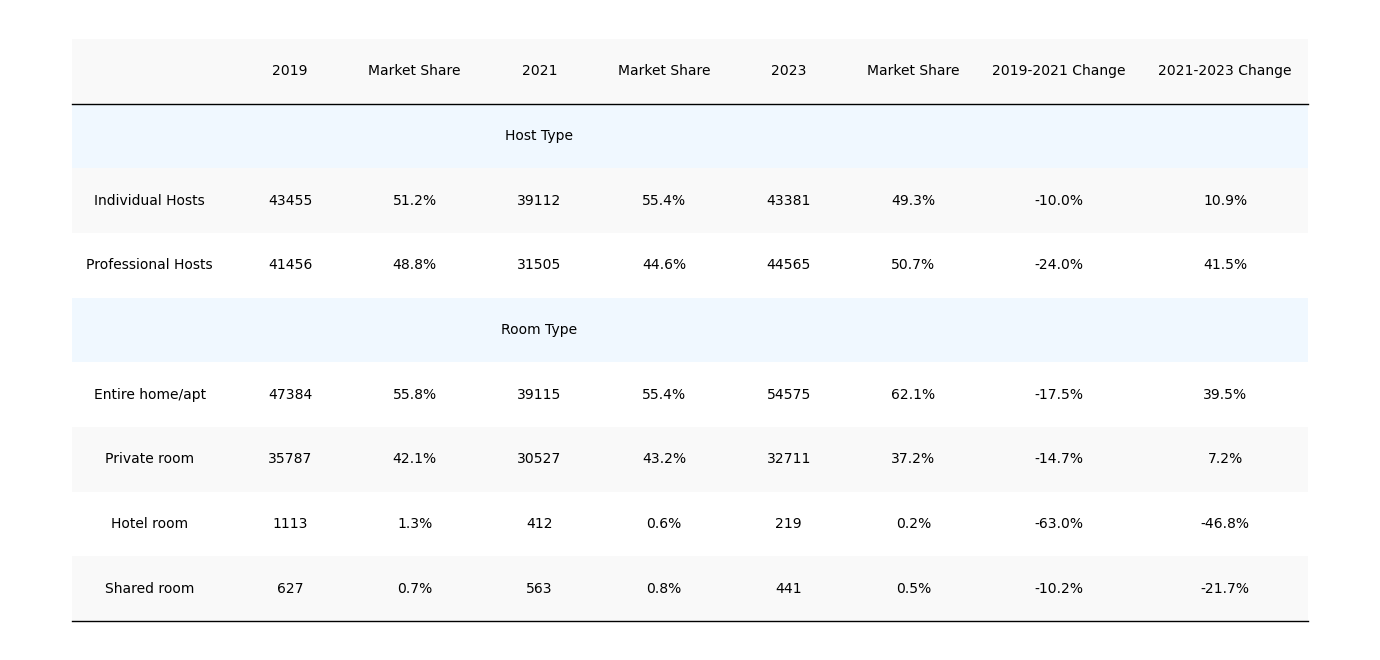

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load datasets
data_2019 = pd.read_csv("cleaned_2019_data.csv")
data_2021 = pd.read_csv("cleaned_2021_data.csv")
data_2023 = pd.read_csv("cleaned_2023_data.csv")

# Add year columns to the data for reference
data_2019['year'] = 2019
data_2021['year'] = 2021
data_2023['year'] = 2023

# Combine all data
data_combined = pd.concat([data_2019, data_2021, data_2023])

# Step 1: Add 'host_type' column to classify hosts
unique_hosts = data_combined.groupby(['year', 'host_id'])['calculated_host_listings_count'].max().reset_index()
unique_hosts['host_type'] = unique_hosts['calculated_host_listings_count'].apply(
    lambda x: 'Individual Host' if x == 1 else 'Professional Host'
)

# Step 2: Calculate Host Type Market Share
def calculate_host_market_share(data, unique_hosts):
    data = data.merge(unique_hosts, on=['year', 'host_id'], how='left')
    total_listings = data.shape[0]  # Total number of listings
    host_type_counts = data.groupby('host_type').size()  # Total listings by host type
    market_share = (host_type_counts / total_listings) * 100  # Market share by host type
    return host_type_counts, market_share

host_market_2019_counts, host_market_2019_share = calculate_host_market_share(data_2019, unique_hosts[unique_hosts['year'] == 2019])
host_market_2021_counts, host_market_2021_share = calculate_host_market_share(data_2021, unique_hosts[unique_hosts['year'] == 2021])
host_market_2023_counts, host_market_2023_share = calculate_host_market_share(data_2023, unique_hosts[unique_hosts['year'] == 2023])

# Step 3: Calculate Room Type Market Share
def calculate_room_market_share(data):
    total_listings = data.shape[0]  # Total number of listings
    room_counts = data['room_type'].value_counts()  # Total listings by room type
    market_share = (room_counts / total_listings) * 100  # Market share by room type
    return room_counts, market_share

room_counts_2019, room_market_2019 = calculate_room_market_share(data_2019)
room_counts_2021, room_market_2021 = calculate_room_market_share(data_2021)
room_counts_2023, room_market_2023 = calculate_room_market_share(data_2023)

# Step 4: Build DataFrame for Host Type
host_type_df = pd.DataFrame({
    "Type": ["Individual Hosts", "Professional Hosts"],
    "2019": host_market_2019_counts.values,
    "2019 Market Share": [f"{x:.1f}%" for x in host_market_2019_share.values],
    "2021": host_market_2021_counts.reindex(host_market_2019_counts.index, fill_value=0).values,
    "2021 Market Share": [f"{x:.1f}%" for x in host_market_2021_share.reindex(host_market_2019_counts.index, fill_value=0).values],
    "2023": host_market_2023_counts.reindex(host_market_2019_counts.index, fill_value=0).values,
    "2023 Market Share": [f"{x:.1f}%" for x in host_market_2023_share.reindex(host_market_2019_counts.index, fill_value=0).values]
})

# Step 5: Build DataFrame for Room Type
room_type_df = pd.DataFrame({
    "Type": room_counts_2019.index.tolist(),
    "2019": room_counts_2019.values,
    "2019 Market Share": [f"{x:.1f}%" for x in room_market_2019.values],
    "2021": room_counts_2021.reindex(room_counts_2019.index, fill_value=0).values,
    "2021 Market Share": [f"{x:.1f}%" for x in room_market_2021.reindex(room_counts_2019.index, fill_value=0).values],
    "2023": room_counts_2023.reindex(room_counts_2019.index, fill_value=0).values,
    "2023 Market Share": [f"{x:.1f}%" for x in room_market_2023.reindex(room_counts_2019.index, fill_value=0).values]
})

# Step 6: Combine DataFrames
final_table = pd.concat([host_type_df, room_type_df], ignore_index=True)

# Step 7: Calculate Percentage Changes
def calculate_change(row, year1, year2):
    if row[year1] > 0:
        return f"{((row[year2] - row[year1]) / row[year1]) * 100:.1f}%"
    return "-"

final_table["2019-2021 Change"] = final_table.apply(lambda row: calculate_change(row, "2019", "2021"), axis=1)
final_table["2021-2023 Change"] = final_table.apply(lambda row: calculate_change(row, "2021", "2023"), axis=1)

# Step 8: Reorder Columns
final_table = final_table[[
    "Type", "2019", "2019 Market Share", "2021", "2021 Market Share", "2023", "2023 Market Share",
    "2019-2021 Change", "2021-2023 Change"
]]

# Step 9: Visualization
host_data = final_table.iloc[:2].values.tolist()  # Host type data
room_data = final_table.iloc[2:].values.tolist()  # Room type data

table_data = [
    ["", "2019", "Market Share", "2021", "Market Share", "2023", "Market Share", "2019-2021 Change", "2021-2023 Change"],  # Column headers
    ["", "", "", "Host Type", "", "", "", "", ""]
] + host_data + [
    ["", "", "", "Room Type", "", "", "", "", ""]
] + room_data

fig, ax = plt.subplots(figsize=(17, 8))
ax.axis("off")

cell_height = 1 / len(table_data)
col_widths = [0.15, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.16, 0.16]
cumulative_widths = [sum(col_widths[:i]) for i in range(len(col_widths) + 1)]

for i, row in enumerate(table_data):
    for j, cell in enumerate(row):
        x = cumulative_widths[j]
        y = 1 - (i + 1) * cell_height
        color = "#f0f8ff" if i in [1, 4] else "#f9f9f9" if i % 2 == 0 else "white"
        ax.add_patch(Rectangle((x, y), col_widths[j], cell_height, facecolor=color, edgecolor="none"))
        ax.text(x + col_widths[j] / 2, y + cell_height / 2, str(cell), ha="center", va="center", fontsize=10)

# Draw horizontal lines spanning all columns (1-9)
ax.plot([0, cumulative_widths[-1]], [1 - cell_height, 1 - cell_height], color="black", linewidth=1)  # Header line
ax.plot([0, cumulative_widths[-1]], [0, 0], color="black", linewidth=1)  # Bottom border

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()
